## Observations and Insights 

1. After removing the duplicated mouse_Id, there were 248 unique mice left that 51% them was male and 49% female.
2. There were 10 kind of drug treatments. Capomulin and Ramicane had the highest contribution in mice treatment test with 230 and 228 numbers of the test respectfully. Propriva with 148 numbers of test had the lowest number of mice tested.
3. Final tumor volume after testing two drugs of capomulin and ramicane was too smaller compared to Infubinol and ceftamin drugs. The plot shows there is an outlier for Infubinol treatment which has a small final tumor volume compare other mice using this treatment drug, lucky mice!
4. The correlation between mouse weight and average tumor volume was 0.84 which is a strong correlation. Meaning that by increasing mouse weight the average tumor volume increases.
5. The regression model and plot show that how tumor volume proportional to weight. By using regression model, we could predict a new tumor volume based on mice weight. R_square value was 0.71 that confirms this model is reasonably accurate in predicting

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import functools
from scipy.stats import linregress
import random
import seaborn as sns


# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_df=pd.merge(mouse_metadata,study_results,how='outer',on="Mouse ID")
# Display the data table for preview
Combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#check if ther is null value and columns type
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
number_mice=Combined_df['Mouse ID'].nunique()
print(f"There are {number_mice} unique mice IDs.")

There are 249 unique mice IDs.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_id=Combined_df.loc[Combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df=Combined_df.loc[Combined_df['Mouse ID']==dup_id[0]]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_df[Combined_df['Mouse ID'].isin(dup_id)==False]


In [7]:
# Checking the number of mice in the clean DataFrame.
number_mice=clean_df['Mouse ID'].nunique()
print(f"Now there are {len(clean_df)} cases with {number_mice} unique mice.")

Now there are 1880 cases with 248 unique mice.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_df=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_df=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_df=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_df=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_df=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table_1=functools.reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True), [mean_df,median_df,variance_df,std_df,sem_df])
summary_table_1.columns=['T_mean','T_median','T_var','T_std','T_sem']
summary_table_1

,T_mean,T_median,T_var,T_std,T_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_2= clean_df.groupby('Drug Regimen').agg(T_mean=('Tumor Volume (mm3)','mean'),
                                                        T_median=('Tumor Volume (mm3)','median'),                   
                                                        T_var=('Tumor Volume (mm3)','var'),
                                                        T_std=('Tumor Volume (mm3)','std'),
                                                        T_sem=('Tumor Volume (mm3)','sem'))
summary_table_2


,T_mean,T_median,T_var,T_std,T_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

,Drug Regimen,Number of mouse
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


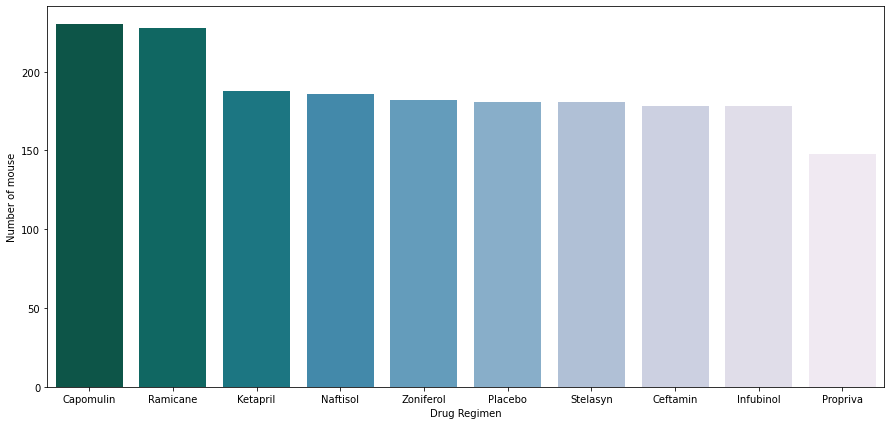

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using seaborn.
treatment_df=clean_df.groupby('Drug Regimen').count().sort_values(by='Timepoint',ascending=False).reset_index()[['Drug Regimen','Mouse ID']]
treatment_df.columns=['Drug Regimen','Number of mouse']
plt.figure(figsize=(15,7))
sns.color_palette("light:#5A9", as_cmap=True)
sns.barplot(x='Drug Regimen',y='Number of mouse',data=treatment_df,palette='PuBuGn_r')
#plt.savefig('images/bar_plot_pandas.png') 
treatment_df

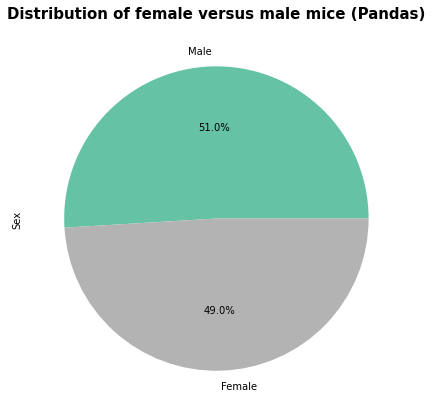

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas,seaborn palette
plt.figure(figsize=(15,7))
clean_df['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%",cmap='Set2')
plt.title('Distribution of female versus male mice (Pandas)',fontsize= 15,pad=10,fontweight="bold")
plt.savefig('images/pie_pandas_plot.png') 
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df=clean_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_Combined_df=pd.merge(clean_df,max_timepoint_df,how='outer',on='Mouse ID')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[new_Combined_df.loc[(new_Combined_df['Timepoint_x']==new_Combined_df['Timepoint_y'])&(new_Combined_df['Drug Regimen']==i)]['Tumor Volume (mm3)'] for i in treatments]

Capomulin_df=tumor_vol_data[0]
Ramicane_df=tumor_vol_data[1]
Infubinol_df=tumor_vol_data[2]
Ceftamin_df=tumor_vol_data[3]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

def outlier_detecter(df,df_original=clean_df):
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    upper_outlier=df.loc[df>upper_bound]
    below_outlier=df.loc[df<lower_bound]
    print(f"The lower quartile of tumor_vol is: {lowerq}")
    print(f"The upper quartile of tumor_vol is: {upperq}")
    print(f"The interquartile range of tumor_vol is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if len(list(upper_outlier))==0:
        print("there isn't be an upper_outlier")
    else:
        print(f"there is {len(list(upper_outlier))} upper outlier/outliers in:")
        index_=upper_outlier.index
        return df_original.iloc[index_,:]

    if len(list(below_outlier))==0:
        print("there isn't be an below_outlier")
    else:
        print(f"there is {len(list(below_outlier))} below outlier/outliers in: ")
        index_=below_outlier.index
        return df_original.iloc[index_,:]
    

In [15]:
# Capomulin
outlier_detecter(Capomulin_df)

The lower quartile of tumor_vol is: 32.37735684
The upper quartile of tumor_vol is: 40.1592203
The interquartile range of tumor_vol is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
there isn't be an upper_outlier
there isn't be an below_outlier


In [16]:
#Ramicane
outlier_detecter(Ramicane_df)

The lower quartile of tumor_vol is: 31.56046955
The upper quartile of tumor_vol is: 40.65900627
The interquartile range of tumor_vol is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
there isn't be an upper_outlier
there isn't be an below_outlier


In [17]:
#Infubinol
outlier_detecter(Infubinol_df)

The lower quartile of tumor_vol is: 54.04860769
The upper quartile of tumor_vol is: 65.52574285
The interquartile range of tumor_vol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
there isn't be an upper_outlier
there is 1 below outlier/outliers in: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [18]:
#Ceftamin
outlier_detecter(Ceftamin_df)

The lower quartile of tumor_vol is: 48.72207785
The upper quartile of tumor_vol is: 64.29983003
The interquartile range of tumor_vol is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
there isn't be an upper_outlier
there isn't be an below_outlier


In [20]:
tumor_vol_data1=[new_Combined_df.loc[(new_Combined_df['Timepoint_x']==new_Combined_df['Timepoint_y'])&(new_Combined_df['Drug Regimen']==i)] for i in treatments]
df1=pd.concat(tumor_vol_data1)

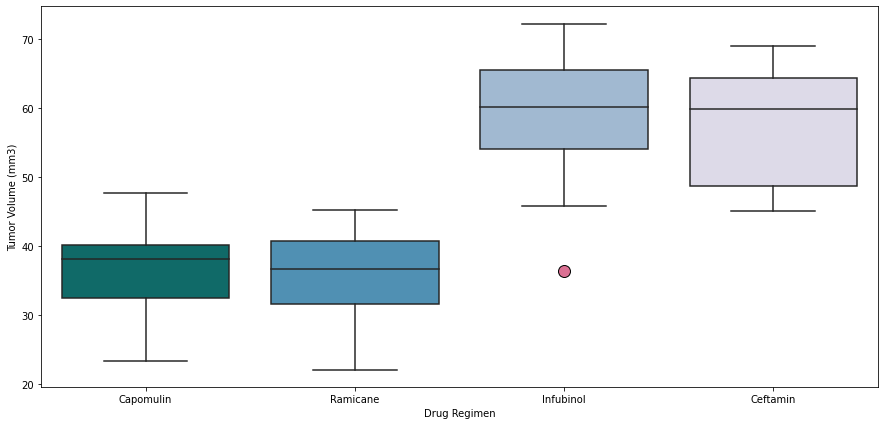

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
medianprops = dict(linestyle='-', linewidth=2, palette='PuBuGn_r')
flierprops = dict(marker='o', markerfacecolor='palevioletred', markersize=12,
                  markeredgecolor='black')
plt.figure(figsize=(15,7))
sns.boxplot(x='Drug Regimen',y='Tumor Volume (mm3)',data=df1,palette='PuBuGn_r',flierprops=flierprops)
plt.savefig('images/box_plot.png') 

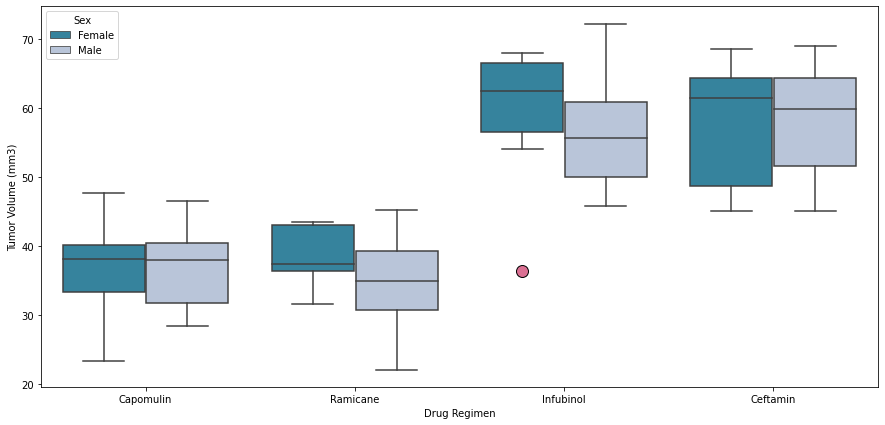

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Drug Regimen',y='Tumor Volume (mm3)',data=df1,palette='PuBuGn_r',hue='Sex',flierprops=flierprops)
plt.savefig('images/box_plot2.png') 

## Line and Scatter Plots

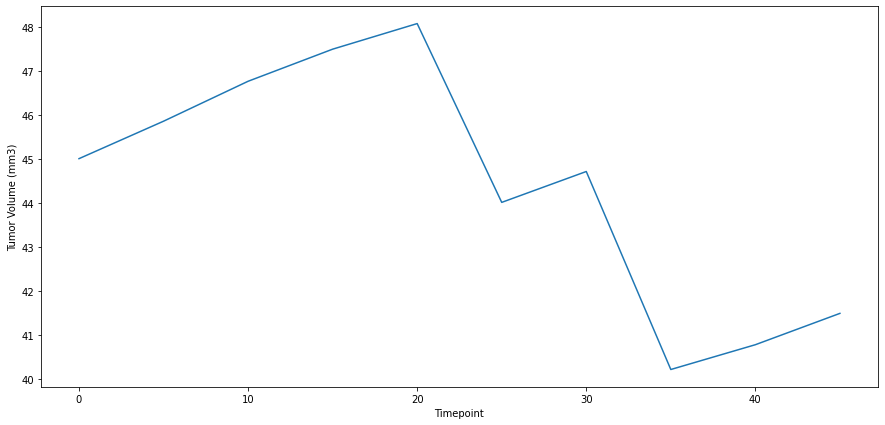

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.figure(figsize=(15,7))
l509_df=clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')&(clean_df['Mouse ID']=='l509')][['Timepoint','Tumor Volume (mm3)']]
sns.lineplot(x='Timepoint',y='Tumor Volume (mm3)',data=l509_df,palette='PuBuGn_r')
plt.savefig('images/line_plot.png') 

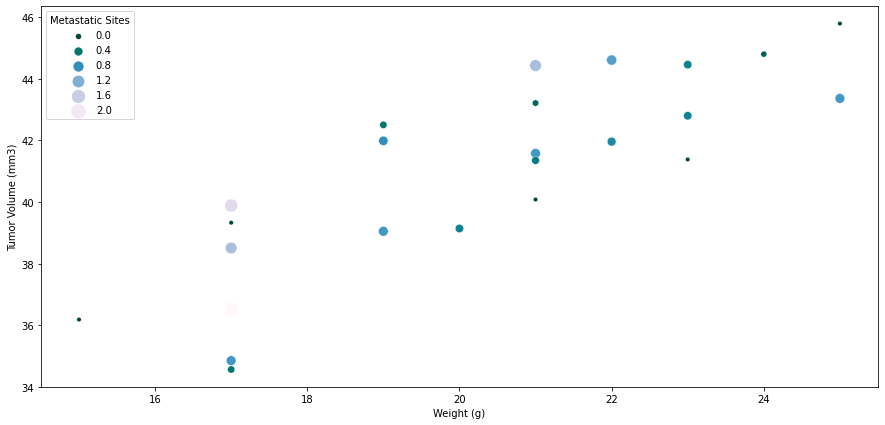

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()
plt.figure(figsize=(15,7))
sns.scatterplot(x='Weight (g)',y='Tumor Volume (mm3)',data=Capomulin_df,palette='PuBuGn_r',
hue='Metastatic Sites',
size="Metastatic Sites",
sizes=(20, 200),
)
plt.savefig('images/scatter_plot.png') 

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val=Capomulin_df['Weight (g)']
y_val=Capomulin_df['Tumor Volume (mm3)']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation between average_tumor and mouse weight for Capomulin is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")

y = 0.95x + 21.55
The correlation between average_tumor and mouse weight for Capomulin is 0.842
The r-squared is: 0.7088568047708717




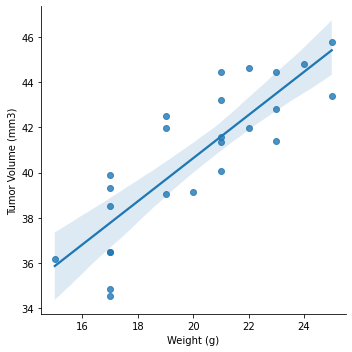

In [27]:
sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)',data=Capomulin_df,palette='PuBuGn_r')
plt.savefig('images/regression_plot.png')